# 🔥 1D Heat Transfer in a Plate

This model describes steady-state heat conduction in a 1D plate with internal heat generation and convective boundary conditions.

## 📘 Governing Equations

$$
\begin{cases}
\lambda \dfrac{d^2 T}{dx^2} + Q(x) = 0 & \text{for } a \leq x \leq b
\\[5mm]
T(x) = T_d & \text{at } x = a
\\[5mm]
\lambda \dfrac{dT}{dx} + H(T_d - T(x)) = 0 & \text{at } x = b
\end{cases}
$$

---


## 🔧 Volumetric Heat Source

$$
Q(x) = Q_0 \, e^{\displaystyle \frac{x - E}{P}}
$$

**Parameters:**

- Volumetric heat generation rate: $ Q_0 \, [\mathrm{W/m^3}] $
- Characteristic heating length: $ P \, [\mathrm{m}] $

---

## 📊 Given Data

$$
\begin{aligned}
&\text{Plate thickness:} && E = 0.1 \, \mathrm{m} \\
&\text{Thermal conductivity:} && \lambda = 30 \, \mathrm{W/(m \cdot K)} \\
&\text{Heat exchange coefficient:} && H = 2000 \, \mathrm{W/(m^2 \cdot K)} \\
&\text{External temperature:} && T_d = 20 \, ^\circ\mathrm{C} \\
&\text{Volumetric heat source:} && Q_0 = 5 \times 10^7 \, \mathrm{W/m^3} \\
&\text{Characteristic heating length:} && P = 0.02 \, \mathrm{m} \\
&\text{Plate geometry} && x \in [a, b] = [0, E]
\end{aligned}
$$

---

## 🧮 Analytical Solution

$$
T(x) = T_d 
+ \frac{Q_0 P}{\lambda + EH} 
\left[1 + \frac{PH}{\lambda} \left(1 - e^{\displaystyle -\frac{E}{P}} \right) \right] x 
+ \frac{Q_0 P^2}{\lambda} 
e^{\displaystyle -\frac{E}{P}} \left(1 - e^{\displaystyle \frac{x}{P}} \right)
$$

---

# Galerkin Method Using Single Finite Element

## 🔹 Step 1: Weak Formulation

We begin by multiplying the governing differential equation by a **weight function** $ w(x) $, which represents a virtual variation in temperature. This is a key idea in the Galerkin method: we test the equation against a set of basis functions to derive a weak (integrated) form.

Starting from the strong form:

$$
\lambda \dfrac{d^2 T}{dx^2} + Q(x) = 0
$$

Multiply both sides by $w(x)$ and integrate over the domain $ [a, b] $:

$$
\int_a^b w(x) \left[ \lambda \dfrac{d^2 T}{dx^2} + Q(x) \right] dx = 0
$$

This is the **weighted residual form**.

### 🔸 Integration by parts

To reduce the order of the derivative on $T$, we apply **integration by parts** to the second-order term:

$$
\int_a^b w(x) \lambda \dfrac{d^2 T}{dx^2} \, dx = 
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx + \left[ \lambda w(x) \dfrac{dT}{dx} \right]_a^b
$$

Substituting back, the weak form becomes:

$$
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx 
+ \left[ \lambda w(x) \dfrac{dT}{dx} \right]_a^b 
+ \int_a^b w(x) Q(x) \, dx = 0
$$

---

## 🔹 Step 2:  Applying Boundary Conditions

We now apply the boundary conditions to simplify the boundary term:

- At $ x = a $, we are given a **Dirichlet boundary condition**:  
  $ T(a) = T_d $  
  This means the temperature is fixed at the left end.  
  In the Galerkin method, the weight function $ w(x) $ must vanish at any point where the solution is prescribed. Therefore, we set:

  $$
  w(a) = 0
  $$

  This ensures that the virtual variation does not alter the known value at the boundary.

- At $ x = b $, we have a **Robin (mixed) boundary condition**:  
  $ \lambda \dfrac{dT}{dx}(b) = H(T_d - T(b)) $  
  Substituting this into the boundary term:

  $$
  \lambda w(b) \dfrac{dT}{dx}(b) = w(b) H(T_d - T(b))
  $$

### 🔸 Final Weak Form

Substituting the boundary conditions into the weak form:

$$
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx 
+ w(b) H(T_d - T(b)) 
+ \int_a^b w(x) Q(x) \, dx = 0
$$

This is the **Galerkin weak form** of the problem, ready for discretization using finite elements.

---

## 🔹 Step 3: Approximate Solution and Weight Function

We approximate the temperature $T(x)$ using Lagrange's linear polynomial:

$$
T(x) = N_1(x) T_1 + N_2(x) T_2 \quad x \in [a, b]
$$

where:
- $T_1$ is the temperature at node $x = a$
- $T_2$ is the temperature at node $x = b$
- $E = b - a$ is the element length

The shape functions are:

- $N_1(x) = \dfrac{b - x}{E}$
- $N_2(x) = \dfrac{x - a}{E}$

These satisfy:
- $N_1(a) = 1$, $N_1(b) = 0$
- $N_2(a) = 0$, $N_2(b) = 1$
- $N_1(x) + N_2(x) = 1$


We choose the weight function $w(x)$ to be the same as the shape functions (Galerkin method):
- First test with $w(x) = N_1(x)$
- Then test with $w(x) = N_2(x)$

## 🔹 Step 4: Applying Test Functions

### 🔸 Weak form from step 2
The Galerkin weak form is:

$$
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx + w(b) H(T_d - T(b)) + \int_a^b w(x) Q(x) \, dx = 0
$$

We test this equation twice:
- First with $w(x) = N_1(x)$
- Then with $w(x) = N_2(x)$


### 🔸 Derivatives of Shape Functions

$$
\begin{cases}
\dfrac{dN_1}{dx} = -\dfrac{1}{E}
\\[5mm]
\dfrac{dN_2}{dx} = \dfrac{1}{E}
\\[5mm]
\dfrac{dT}{dx} = \dfrac{dN_1}{dx} T_1 + \dfrac{dN_2}{dx} T_2 = \dfrac{1}{E}(T_2 - T_1)
\end{cases}
$$

### 🔸 Test with $w(x) = N_1(x)$

We start from the Galerkin weak form:

$$
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx + w(b) H(T_d - T(b)) + \int_a^b w(x) Q(x) \, dx = 0
$$

Using $w(x) = N_1(x)$ and noting that $N_1(b) = 0$, the boundary term vanishes. So we have:

$$
- \lambda \int_a^b \left( \dfrac{dN_1}{dx} \right) \left( \dfrac{dT}{dx} \right) dx + \int_a^b N_1(x) Q(x) dx = 0
$$

Substitute the derivatives, then:

$$
- \lambda \int_a^b \left( -\dfrac{1}{E} \right) \left( \dfrac{1}{E}(T_2 - T_1) \right) dx + \int_a^b N_1(x) Q(x) dx = 0
$$

Simplify the first term:

$$
\lambda \dfrac{1}{E^2}(T_2 - T_1)(b - a) = \lambda \dfrac{1}{E}(T_2 - T_1)
$$

So the equation becomes:

$$
\lambda \dfrac{1}{E}(T_2 - T_1) + \int_a^b N_1(x) Q(x) dx = 0 \quad \text{(Eq. 1)}
$$

This is the first algebraic equation from Galerkin FEM using $w(x) = N_1(x)$.

The integral term involving $Q(x)$ will be evaluated separately in the next step.


### 🔸 Test with $w(x) = N_2(x)$

We again start from the Galerkin weak form:

$$
- \int_a^b \lambda \dfrac{d w}{dx} \dfrac{dT}{dx} \, dx + w(b) H(T_d - T(b)) + \int_a^b w(x) Q(x) \, dx = 0
$$

This time, we choose $w(x) = N_2(x)$, and note that $N_2(b) = 1$, so the **Robin boundary condition** contributes to the boundary term.

Substitute into the weak form:

$$
- \lambda \int_a^b \left( \dfrac{dN_2}{dx} \right) \left( \dfrac{dT}{dx} \right) dx + H(T_d - T_2) + \int_a^b N_2(x) Q(x) dx = 0
$$

Using:

$\displaystyle\dfrac{dN_2}{dx} = \dfrac{1}{E}$, and
$\displaystyle\dfrac{dT}{dx} = \dfrac{1}{E}(T_2 - T_1)$

We get:

$$
- \lambda \int_a^b \left( \dfrac{1}{E} \right) \left( \dfrac{1}{E}(T_2 - T_1) \right) dx + H(T_d - T_2) + \int_a^b N_2(x) Q(x) dx = 0
$$

Simplify the first term:

$$
- \lambda \dfrac{1}{E^2}(T_2 - T_1)(b - a) = - \lambda \dfrac{1}{E}(T_2 - T_1)
$$

So the equation becomes:

$$
- \lambda \dfrac{1}{E}(T_2 - T_1) + H(T_d - T_2) + \int_a^b N_2(x) Q(x) dx = 0 \quad \text{(Eq. 2)}
$$

This is the second algebraic equation from Galerkin FEM using $w(x) = N_2(x)$.

The integral term involving $Q(x)$ will be evaluated separately in the next step.


## 🔹 Step 5:Evaluation of Source Term Integrals

We now evaluate the integrals involving the heat generation term:

$$
Q(x) = Q_0 \, e^{\frac{x - E}{P}}
$$

### 🔸 Case 1: Integral with $N_1(x)$

Recall:

$$
N_1(x) = \dfrac{b - x}{E}
$$

So the integral becomes:

$$
\int_a^b N_1(x) Q(x) dx = \int_a^b \dfrac{b - x}{E} Q_0 \, e^{\frac{x - E}{P}} dx
= \dfrac{Q_0}{E} \int_a^b (b - x) e^{\frac{x - E}{P}} dx
$$

Let’s denote this as:

$$
I_1 = \dfrac{Q_0}{E} \int_a^b (b - x) e^{\frac{x - E}{P}} dx
$$

This integral can be evaluated analytically or numerically depending on the context. Here is the analytical solution.

$$
I_1 = \frac{Q_0 P}{E} \left[ P \, e^{\displaystyle\frac{b-E}{P}} - (b-a+P) \, e^{\displaystyle\frac{a-E}{P}} \right]
$$



### 🔸 Case 2: Integral with $N_2(x)$

Recall:

$$
N_2(x) = \dfrac{x - a}{E}
$$

So the integral becomes:

$$
\int_a^b N_2(x) Q(x) dx = \int_a^b \dfrac{x - a}{E} Q_0 \, e^{\frac{x - E}{P}} dx
= \dfrac{Q_0}{E} \int_a^b (x - a) e^{\frac{x - E}{P}} dx
$$

Let’s denote this as:

$$
I_2 = \dfrac{Q_0}{E} \int_a^b (x - a) e^{\frac{x - E}{P}} dx
$$

Again, this integral can be evaluated analytically or numerically. Here is the analytical solution:

$$
I_2 = \frac{Q_0 P}{E} \left[ (b-a-P) e^{\displaystyle\frac{b-E}{P}} + P \, e^{\displaystyle\frac{a-E}{P}} \right]
$$


These expressions $I_1$ and $I_2$ are substituted into the algebraic equations derived from the Galerkin method to complete the system.

## 🔹 Step 6: Final Algebraic Equations to Solve for $T_1$ and $T_2$

Using Galerkin FEM with one linear element over $x \in [a, b]$, and applying the analytical expressions for the source term integrals, we obtain the following two equations:

### 🔸 Equation 1: From $w(x) = N_1(x)$

$$
\lambda \dfrac{1}{E}(T_2 - T_1) + \dfrac{Q_0 P}{E} \left[ P \, e^{\displaystyle\frac{b - E}{P}} - (b - a + P) \, e^{\displaystyle\frac{a - E}{P}} \right] = 0
$$

### 🔸 Equation 2: From $w(x) = N_2(x)$

$$
- \lambda \dfrac{1}{E}(T_2 - T_1) + H(T_d - T_2) + \dfrac{Q_0 P}{E} \left[ (b - a - P) \, e^{\displaystyle\frac{b - E}{P}} + P \, e^{\displaystyle\frac{a - E}{P}} \right] = 0
$$

These two equations form a linear system that can be solved for $T_1$ and $T_2$. If $T_1 = T_d$ is prescribed by Dirichlet boundary condition, only Equation 2 is needed to compute $T_2$.

## Python Code

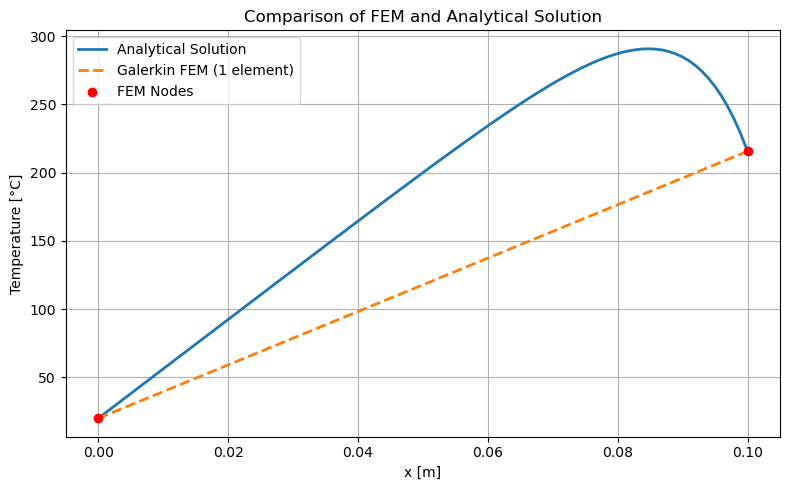

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters
λ = 30.0       # thermal conductivity [W/m·K]
H = 2000.0     # heat transfer coefficient [W/m²·K]
T_d = 20.0     # Dirichlet BC at x=a [°C]
Q_0 = 5e7      # volumetric heat generation [W/m³]
P = 0.01       # characteristic heating length [m]

# Domain
a = 0.0        # left node [m]
b = 0.1        # right node [m]
E = b - a      # element length [m]

# Source term integrals (analytical expressions)
I1 = (Q_0 * P / E) * (P * np.exp((b - E) / P) - (b - a + P) * np.exp((a - E) / P))
I2 = (Q_0 * P / E) * ((b - a - P) * np.exp((b - E) / P) + P * np.exp((a - E) / P))

# FEM solution
T1 = T_d
A = λ / E + H
B = λ / E * T1 + H * T_d + I2
T2_fem = B / A

# Analytical solution function
def analytical_solution(x, Q_0, λ, H, T_d, P, E):
    term1 = T_d
    term2 = (Q_0 * P**2 / λ) * np.exp(-E / P) * (1 - np.exp(x / P))
    term3 = (Q_0 * P / (λ + H * E)) * (1 + (H * P / λ) * (1 - np.exp(-E / P))) * x
    return term1 + term2 + term3

# Plotting
x_vals = np.linspace(a, b, 100)
T_exact_vals = analytical_solution(x_vals, Q_0, λ, H, T_d, P, E)
T_fem_vals = T1 + (T2_fem - T1) * (x_vals - a) / E

plt.figure(figsize=(8, 5))
plt.plot(x_vals, T_exact_vals, label='Analytical Solution', linewidth=2)
plt.plot(x_vals, T_fem_vals, '--', label='Galerkin FEM (1 element)', linewidth=2)
plt.scatter([a, b], [T1, T2_fem], color='red', zorder=5, label='FEM Nodes')
plt.xlabel('x [m]')
plt.ylabel('Temperature [°C]')
plt.title('Comparison of FEM and Analytical Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  Galerkin Finite Element Method with Domain Discretization

### 🔸 Step 1: Domain Discretization

- Divide the domain $x \in [0, E]$ into $n$ nodes and $(n - 1)$ linear elements.
- Let nodes be: $x_1 = 0,\ x_2,\ \dots,\ x_n = E$
- Each element $e$ spans from node $x_i$ to $x_{i+1}$ with length:
  $$
  h = x_{i+1} - x_i
  $$

### 🔸 Step 2: Derivation of Local Equations in Galerkin FEM

We begin with the weak form over a single element $e = [x_i, x_{i+1}]$:

$$
- \int_{x_i}^{x_{i+1}} \lambda \frac{d w}{dx} \frac{dT}{dx} \, dx 
+ \left[ \lambda w(x) \frac{dT}{dx} \right]_{x_i}^{x_{i+1}} 
+ \int_{x_i}^{x_{i+1}} w(x) Q(x) \, dx = 0
$$

#### 🔸1. Boundary Term

The boundary term in the weak form is:

$$
\left[ \lambda N_j(x) \frac{dT}{dx} \right]_{x_i}^{x_{i+1}}
$$

This term represents the **flux across the element boundaries**. It is:

- **Non-zero only at global boundaries** (i.e., the first and last nodes of the domain).
- **Internally canceled** during global assembly because adjacent elements share nodes and their contributions offset.

Therefore, we **ignore this term in the element-level formulation** and handle it **separately** when applying boundary conditions such as:

- **Dirichlet boundary conditions**: directly enforce temperature values.
- **Neumann or Robin boundary conditions**: incorporate flux terms at the domain boundaries.

This simplifies the element equations while preserving physical accuracy at the boundaries.

#### 🔸 2. Choose Test Function

In Galerkin FEM, we choose the test function $w(x)$ to be the same as the shape functions:

- $w(x) = N_1(x)$ → equation for node $i$
- $w(x) = N_2(x)$ → equation for node $i+1$


#### 🔸 3. Approximate $T(x)$ Using Shape Functions

We approximate the temperature field:

$$
T(x) \approx N_1(x) T_i + N_2(x) T_{i+1}
$$

Then:

$$
\frac{dT}{dx} = \frac{dN_1}{dx} T_i + \frac{dN_2}{dx} T_{i+1}
$$

#### 🔸4. Derive Shape Function Derivatives

Let $h = x_{i+1} - x_i$. The linear shape functions are:

$$
\begin{align}
 N_1(x) &= \dfrac{x_{i+1} - x}{h} \\[5mm]
 N_2(x) &= \dfrac{x - x_i}{h}
\end{align} 
$$

Their derivatives are constant:

$$
\begin{align}
 \dfrac{dN_1}{dx} &= -\dfrac{1}{h} \\[5mm]
 \dfrac{dN_2}{dx} &= \dfrac{1}{h}
\end{align} 
$$

#### 🔸 5. Evaluate the Diffusion Term

We now compute the first term:

$$
- \int_{x_i}^{x_{i+1}} \lambda \frac{dN_j}{dx} \frac{dT}{dx} \, dx
= - \int_{x_i}^{x_{i+1}} \lambda \frac{dN_j}{dx} \left( \frac{dN_1}{dx} T_i + \frac{dN_2}{dx} T_{i+1} \right) dx
$$

Since all derivatives are constant, we can factor them out:

$$
= - \lambda \frac{dN_j}{dx} \left( \frac{dN_1}{dx} T_i + \frac{dN_2}{dx} T_{i+1} \right) \cdot h
$$

This leads to a linear system for each test function $N_j$, which we express as:

$$
K^{(e)}_{j1} T_i + K^{(e)}_{j2} T_{i+1}
$$

#### 🔸 6. Construct the Local Stiffness Matrix $K^{(e)}$

We now compute each entry:

* $K^{(e)}_{11}$

$$
K^{(e)}_{11} = \int_{x_i}^{x_{i+1}} \lambda \left( \frac{dN_1}{dx} \right)^2 dx
= \lambda \left( \frac{1}{h^2} \right) h = \frac{\lambda}{h}
$$

* $K^{(e)}_{12}$

$$
K^{(e)}_{12} = \int_{x_i}^{x_{i+1}} \lambda \left( \frac{dN_1}{dx} \cdot \frac{dN_2}{dx} \right) dx
= \lambda \left( -\frac{1}{h} \cdot \frac{1}{h} \right) h = -\frac{\lambda}{h}
$$

* $K^{(e)}_{21} = K^{(e)}_{12}$

* $K^{(e)}_{22}$

$$
K^{(e)}_{22} = \int_{x_i}^{x_{i+1}} \lambda \left( \frac{dN_2}{dx} \right)^2 dx
= \lambda \left( \frac{1}{h^2} \right) h = \frac{\lambda}{h}
$$

#### 🔸7. Load Vector Definition

The local load vector is:

$$
f^{(e)} =
\begin{bmatrix*}[r]
 \displaystyle \int_{x_i}^{x_{i+1}} N_1(x) Q(x)  dx \\
 \displaystyle \int_{x_i}^{x_{i+1}} N_2(x) Q(x)  dx
\end{bmatrix*} =
\begin{bmatrix}
 I_1 \\
 I_2
\end{bmatrix}
$$

Let $h = x_{i+1} - x_i$. Then using analytical integration for source term gives:

$$
f^{(e)} =
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix} =
\frac{Q_0 P}{h}
\begin{bmatrix}
(x_{i+1} - E + P)(e^{\frac{x_{i+1} - E}{P}} - e^{\frac{x_i - E}{P}}) - \left[(x_{i+1} - E) e^{\frac{x_{i+1} - E}{P}} - (x_i - E) e^{\frac{x_i - E}{P}} \right] \\[10pt]
(E - x_i - P)(e^{\frac{x_{i+1} - E}{P}} - e^{\frac{x_i - E}{P}}) + \left[(x_{i+1} - E) e^{\frac{x_{i+1} - E}{P}} - (x_i - E) e^{\frac{x_i - E}{P}} \right]
\end{bmatrix}
$$


These expressions give the exact contribution of the source term to the element load vector, avoiding numerical quadrature.

#### 🔸 8. Final Element Equation

The element-level system becomes:

$$
\underbrace{
\frac{\lambda}{h}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
}_{K^{(e)}}
\cdot
\begin{bmatrix}
T_i \\
T_{i+1}
\end{bmatrix}
=
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix}
$$

### 🔸 Step 3: Assembly of the Global System in Galerkin FEM

Now that we have derived the local element equations of the form:

$$
K^{(e)} \cdot \mathbf{T}^{(e)} = \mathbf{f}^{(e)}
$$

we proceed to assemble the global system that spans the entire domain.

#### 🔸 1. Domain Discretization

Let the domain $x \in [0, E]$ be divided into $n$ nodes and $n-1$ linear elements:

- Nodes: $x_1 = 0,\ x_2,\ \dots,\ x_n = E$
- Elements: $e_1 = [x_1, x_2],\ e_2 = [x_2, x_3],\ \dots,\ e_{n-1} = [x_{n-1}, x_n]$
- Element length: $h = x_{i+1} - x_i$ (assumed uniform)


#### 🔸 2. Global Structures

We define:

- Global stiffness matrix $K \in \mathbb{R}^{n \times n}$
- Global load vector $f \in \mathbb{R}^{n}$
- Unknown temperature vector $\mathbf{T} = [T_1,\ T_2,\ \dots,\ T_n]^T$

All initialized to zero before assembly.

#### 🔸 3. Element Contributions

For each element $e = [x_i, x_{i+1}]$, compute:

##### a. Local Stiffness Matrix

$$
K^{(e)} =
\frac{\lambda}{h}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
$$

##### b. Local Load Vector

Use the analytical expressions:

$$
f^{(e)} =
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix} =
\frac{Q_0 P}{h}
\begin{bmatrix}
(x_{i+1} - E + P)(e^{\frac{x_{i+1} - E}{P}} - e^{\frac{x_i - E}{P}}) - \left[(x_{i+1} - E) e^{\frac{x_{i+1} - E}{P}} - (x_i - E) e^{\frac{x_i - E}{P}} \right] \\[10pt]
(E - x_i - P)(e^{\frac{x_{i+1} - E}{P}} - e^{\frac{x_i - E}{P}}) + \left[(x_{i+1} - E) e^{\frac{x_{i+1} - E}{P}} - (x_i - E) e^{\frac{x_i - E}{P}} \right]
\end{bmatrix}
$$


Then:

$$
\mathbf{f}^{(e)} =
\begin{bmatrix}
I_1 \\
I_2
\end{bmatrix}
$$

#### 🔸 4. Assembly Procedure

Map local indices $[0, 1]$ to global indices $[i, i+1]$ and update:

```python
K[i:i+2, i:i+2] += K_e
f[i:i+2] += f_e
```

##### Resulting Global Stiffness Matrix

The global stiffness matrix $K$ is assembled by summing the contributions from each local element matrix $K^{(e)}$ into the appropriate positions. For a 1D domain with $n$ nodes and linear elements, the structure of $K$ is typically **symmetric and tridiagonal**.

Schematic form:

$$
K =
\begin{bmatrix}
K_{11} & K_{12} & 0      & \cdots & 0 \\
K_{21} & K_{22} & K_{23} & \cdots & 0 \\
0      & K_{32} & K_{33} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0      & 0      & 0      & \cdots & K_{nn}
\end{bmatrix}
$$

Each entry $K_{ij}$ is computed by accumulating the contributions from all elements that connect nodes $i$ and $j$:

- Diagonal entries $K_{ii}$ receive contributions from **two adjacent elements** (except at boundaries).
- Off-diagonal entries $K_{i,i+1}$ and $K_{i+1,i}$ represent the coupling between neighboring nodes.

This matrix structure ensures continuity of the solution and reflects the physics of diffusion across the domain.


##### Resulting Global Load Vector

The global load vector $\mathbf{f}$ after assembly is **not a simple concatenation** of local vectors. Instead, it reflects the **accumulated contributions** from each element to the shared nodes.

Schematic form:

$$
\mathbf{f} =
\begin{bmatrix}
f_1^{(e_1)} \\
f_2^{(e_1)} + f_1^{(e_2)} \\
f_2^{(e_2)} + f_1^{(e_3)} \\
\vdots \\
f_n^{(e_{n-1})}
\end{bmatrix}
$$

Each entry $f_i$ in the global vector is the **sum of all local load contributions** from elements that include node $i$.

So yes — $\mathbf{f}$ **changes during assembly** because each global node receives contributions from multiple elements, ensuring continuity and consistency across the domain.


#### 🔸 5. Apply Boundary Conditions

Once the global stiffness matrix $K$ and load vector $f$ are assembled, we apply boundary conditions to ensure the system reflects the physical constraints of the problem.

##### a. Dirichlet Boundary Condition at $x = 0$

If the temperature at the left boundary is prescribed as $T_1 = T_d$, we modify the system:

- Replace the first row of $K$ with a unit row: $K[0, :] = [1,\ 0,\ 0,\ \dots,\ 0]$
- Set the first entry of $f$: $f[0] = T_d$

This enforces the known temperature directly into the system.

##### b. Robin or Neumann Boundary Condition at $x = E$

If a Robin condition is applied at the right boundary (node $n$), such as:

$$
- \lambda \frac{dT}{dx} + H T = H T_d
$$

We modify the last row of the system:

- Add $H$ to the diagonal: $K[n-1, n-1] \leftarrow K[n-1, n-1] + H$
- Add $H T_d$ to the load vector: $f[n-1] \leftarrow f[n-1] + H T_d$

#### 🔸 6. Final Global System

After applying all boundary conditions, the final system of equations is:

$$
K \cdot \mathbf{T} = \mathbf{f}
$$

Where:

- $K$ is the global stiffness matrix of size $n \times n$
- $\mathbf{T}$ is the vector of unknown nodal temperatures: $\mathbf{T} = [T_1,\ T_2,\ \dots,\ T_n]^T$
- $\mathbf{f}$ is the global load vector including source terms and boundary contributions

This system can now be solved using a linear solver to obtain the temperature distribution across the domain.

### 🔸 Python Code: Galerkin FEM with Analytical Load Vector

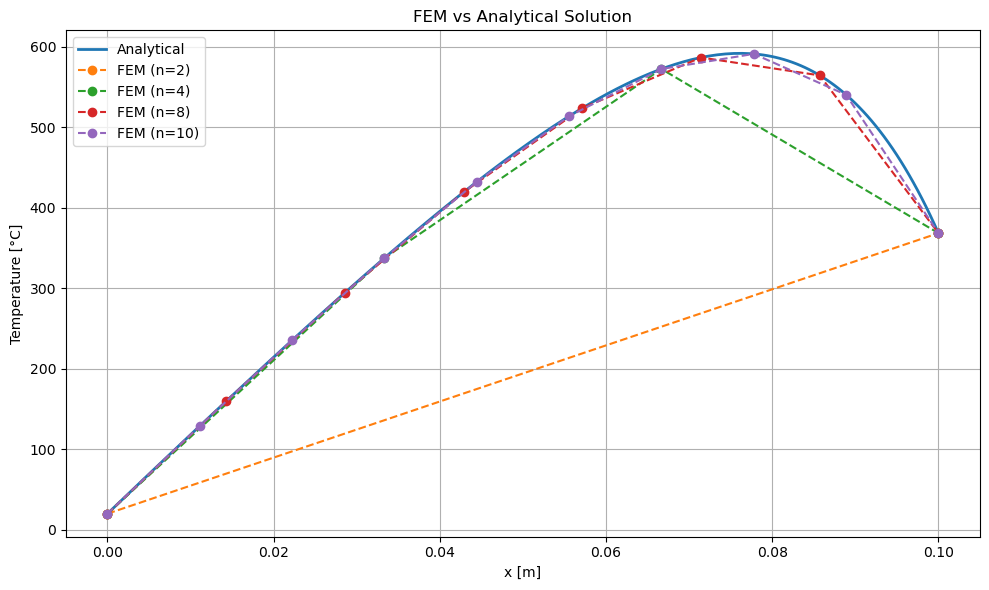

🔹 Error Metrics (L2 norm):
  n =  2 → Error = 1.4492e-13
  n =  4 → Error = 1.0648e-13
  n =  8 → Error = 1.1807e-13
  n = 10 → Error = 8.2120e-13


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters
λ = 30.0       # thermal conductivity [W/m·K]
H = 2000.0     # heat transfer coefficient [W/m²·K]
T_d = 20.0     # Dirichlet BC at x=0 [°C]
Q_0 = 5e7      # volumetric heat generation [W/m³]
P = 0.02       # characteristic heating length [m]
E = 0.1        # domain length [m]

# Analytical solution
def analytical_solution(x, Q_0, λ, H, T_d, P, E):
    term1 = T_d
    term2 = (Q_0 * P**2 / λ) * np.exp(-E / P) * (1 - np.exp(x / P))
    term3 = (Q_0 * P / (λ + H * E)) * (1 + (H * P / λ) * (1 - np.exp(-E / P))) * x
    return term1 + term2 + term3

# Element load vector using analytical integration
def analytical_load_vector(xi, xj, Q0, P, E):
    h = xj - xi
    a = xi - E
    b = xj - E

    exp_a = np.exp(a / P)
    exp_b = np.exp(b / P)

    term1 = (xj - E + P) * (exp_b - exp_a)
    term2 = b * exp_b - a * exp_a
    I1 = (Q0 * P / h) * (term1 - term2)

    term3 = (E - xi - P) * (exp_b - exp_a)
    I2 = (Q0 * P / h) * (term3 + term2)

    return I1, I2

def numerical_load_vector(xi, xj, Q_0, P, E):
    # Integration using midpoint
    h=xj-xi
    xm = 0.5 * (xi + xj)
    N1 = (xj - xm) / h
    N2 = (xm - xi) / h
    Qm = Q_0 * np.exp((xm - E) / P)
    fe = Qm * h * np.array([N1, N2])    
    return fe
    
# FEM solver
def fem_solver(n_nodes):
    h = E / (n_nodes - 1)
    x = np.linspace(0, E, n_nodes)

    # Global stiffness matrix and load vector
    K = np.zeros((n_nodes, n_nodes))
    f = np.zeros(n_nodes)

    for i in range(n_nodes - 1):
        xi, xj = x[i], x[i+1]

        # Element stiffness matrix
        Ke = (λ / h) * np.array([[1, -1], [-1, 1]])

        # Element load vector (analytical)
        fe = analytical_load_vector(xi, xj, Q_0, P, E)
        #fe = numerical_load_vector(xi, xj, Q_0, P, E)
        

        # Assembly
        K[i:i+2, i:i+2] += Ke
        f[i:i+2] += fe

    # Apply Dirichlet BC at x=0
    K[0, :] = 0
    K[0, 0] = 1
    f[0] = T_d

    # Apply Robin BC at x=E
    K[-1, -1] += H
    f[-1] += H * T_d

    # Solve system
    T = np.linalg.solve(K, f)
    return x, T

# Simulation and error analysis
mesh_sizes = [2, 4, 8, 10]
errors = []

plt.figure(figsize=(10, 6))
x_exact = np.linspace(0, E, 200)
T_exact = analytical_solution(x_exact, Q_0, λ, H, T_d, P, E)
plt.plot(x_exact, T_exact, label='Analytical', linewidth=2)

for n in mesh_sizes:
    x_fem, T_fem = fem_solver(n)
    T_interp = analytical_solution(x_fem, Q_0, λ, H, T_d, P, E)
    error = np.linalg.norm(T_fem - T_interp, ord=2) / np.sqrt(n)
    errors.append(error)
    plt.plot(x_fem, T_fem, '--o', label=f'FEM (n={n})')

plt.xlabel('x [m]')
plt.ylabel('Temperature [°C]')
plt.title('FEM vs Analytical Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Error report
print("🔹 Error Metrics (L2 norm):")
for n, err in zip(mesh_sizes, errors):
    print(f"  n = {n:2d} → Error = {err:.4e}")
